In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100pd.set_option('display.max_columns', 500)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150
pd.options.display.max_columns = 100


functions:

In [241]:
def fill_most(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col] == group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(
                df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond,
                                            col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))


def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col] == group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(
            method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))


# method can be "mode" or "median" or "ffill"
def fill(df, group_col1, group_col2, col_name, method):
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1] == group1
                cond2 = (df[group_col1] == group1) & (df[group_col2] == group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(
                        df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(
                        df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2,
                                                     col_name].fillna(df[col_name].mode()[0])

    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1] == group1
                cond2 = (df[group_col1] == group1) & (df[group_col2] == group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median(
                )).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())

    elif method == "ffill":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1] == group1) & (df[group_col2] == group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(
                    method="ffill").fillna(method="bfill")

        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1] == group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(
                method="ffill").fillna(method="bfill")

        df[col_name] = df[col_name].fillna(
            method="ffill").fillna(method="bfill")

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))


In [242]:
df = pd.read_csv("autoscout_filled.csv")


In [243]:
df.shape

(15919, 26)

In [244]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
previous_owners        0
inspection_new         0
paint_type             0
num_of_doors           0
num_of_seats           0
gearing_type           0
drive_chain            0
fuel                   0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
age                    0
hp_kw                  0
type                   0
upholstery_type        0
upholstery_color       0
displacement_cc        0
weight_kg              0
cons_comb              0
dtype: int64

In [245]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,VAT deductible,VAT deductible
km,56013.000,80000.000,83450.000,73000.000,16200.000
...,...,...,...,...,...
upholstery_type,Cloth,Cloth,Cloth,Cloth,Cloth
upholstery_color,Black,Grey,Black,Black,Black
displacement_cc,1422.000,1798.000,1598.000,1422.000,1422.000
weight_kg,1220.000,1255.000,1135.000,1195.000,1135.000


In [246]:
df.duplicated().value_counts()


False    14275
True      1644
dtype: int64

### Let's take a look at the numeric columns.

### price

In [247]:
df.price.describe()

count   15919.000
mean    18019.897
std      7386.169
min        13.000
25%     12850.000
50%     16900.000
75%     21900.000
max     74600.000
Name: price, dtype: float64

In [248]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [249]:
df.price.value_counts(normalize=True)


14990   0.010
15990   0.009
10990   0.009
15900   0.007
17990   0.006
         ... 
17559   0.000
17560   0.000
17570   0.000
17575   0.000
39875   0.000
Name: price, Length: 2956, dtype: float64

In [250]:
df.price.sort_values().head(10)


8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
Name: price, dtype: int64

In [251]:
df.shape

(15919, 26)

In [252]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [253]:
df.shape

(15915, 26)

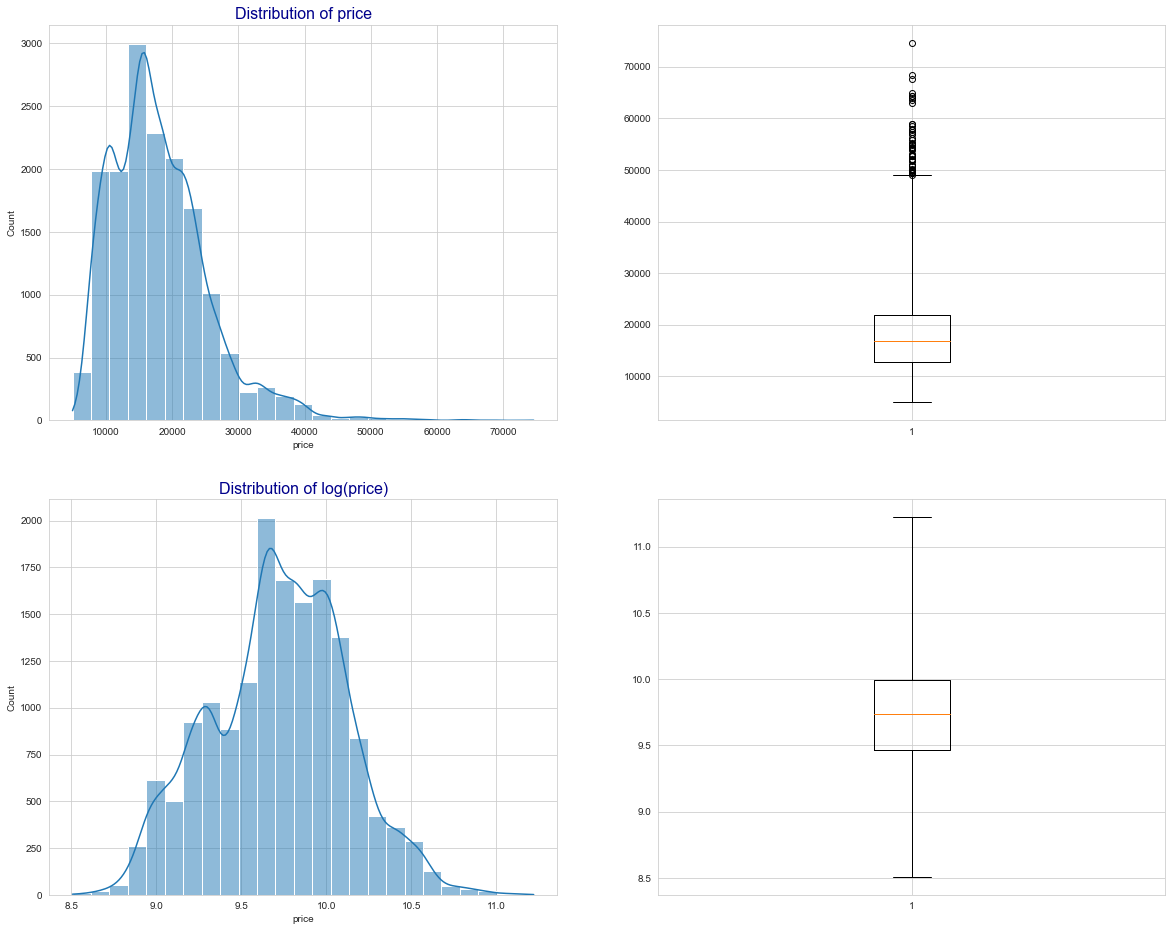

In [254]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='price', bins=25, kde=True)
plt.title('Distribution of price', fontsize=16, color="darkblue")

plt.subplot(2, 2, 2)
plt.boxplot(df.price, whis=3)

plt.subplot(2, 2, 3)
sns.histplot(data=df, x=np.log(df.price), bins=25, kde=True)
plt.title('Distribution of log(price)', fontsize=16, color="darkblue")

plt.subplot(2, 2, 4)
plt.boxplot(np.log(df.price), whis=2.3)
plt.show()

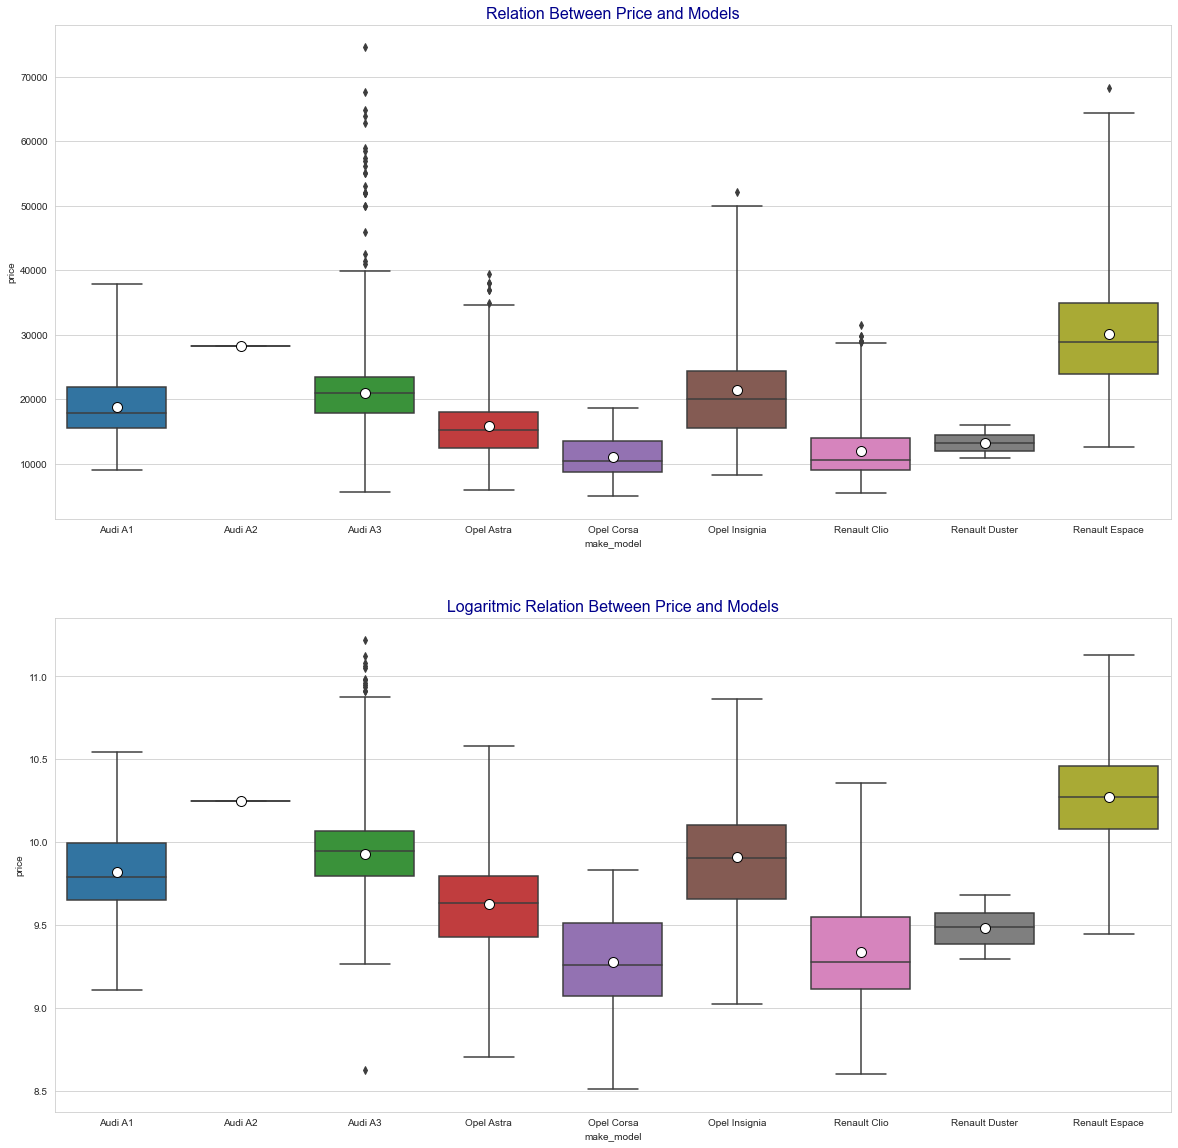

In [255]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
sns.boxplot(x="make_model", y="price", data=df, whis=3, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title('Relation Between Price and Models', fontsize=16, color="darkblue")

plt.subplot(2, 1, 2)
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=3, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.title('Logaritmic Relation Between Price and Models', fontsize=16, color="darkblue")
plt.show()


### age

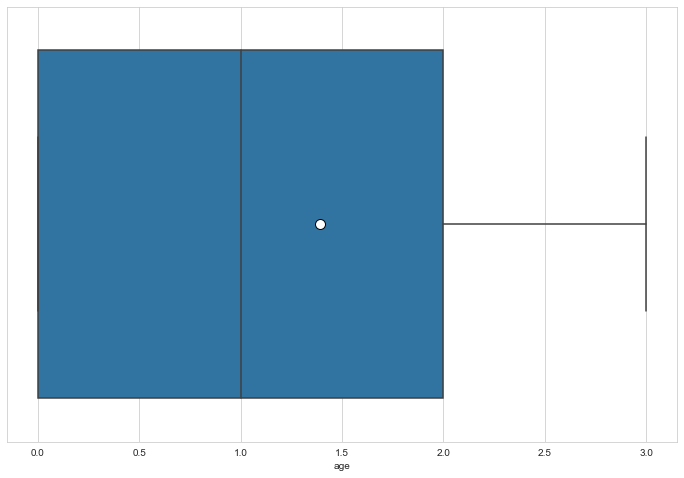

In [256]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='age', showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

In [257]:
index = df['age'].value_counts().index
values = df['age'].value_counts().values


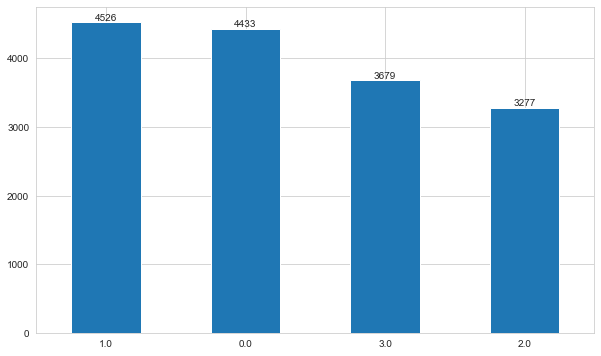

In [258]:
fig, ax = plt.subplots()

df['age'].value_counts().plot(
    kind='bar', x=index, y=values)


plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container)


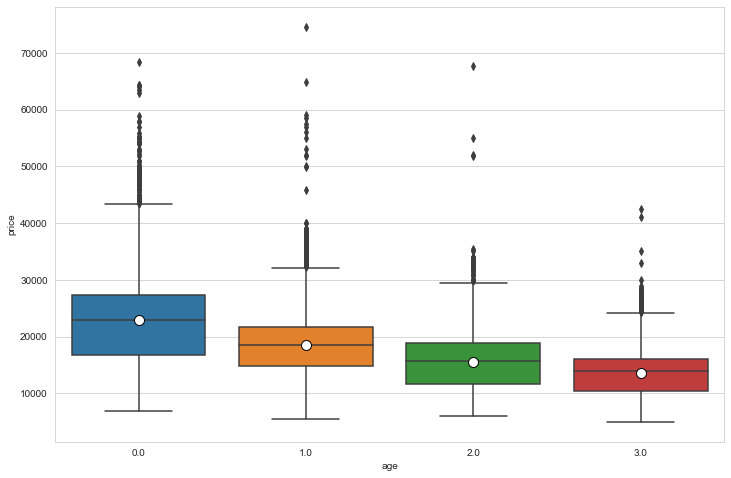

In [259]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='price', x='age', showmeans=True,  
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [260]:
df.groupby("age").price.describe()


,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0.000,4433.000,23012.605,8724.468,6900.000,16690.000,22990.000,27350.000,68320.000
1.000,4526.000,18468.135,6036.986,5555.000,14800.000,18490.000,21700.000,74600.000
2.000,3277.000,15586.869,5268.857,6000.000,11600.000,15700.000,18900.000,67600.000
3.000,3679.000,13639.083,4440.379,4950.000,10400.000,13880.000,15980.000,42500.000


In [261]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'inspection_new', 'paint_type', 'num_of_doors', 'num_of_seats',
       'gearing_type', 'drive_chain', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'age',
       'hp_kw', 'type', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

### km

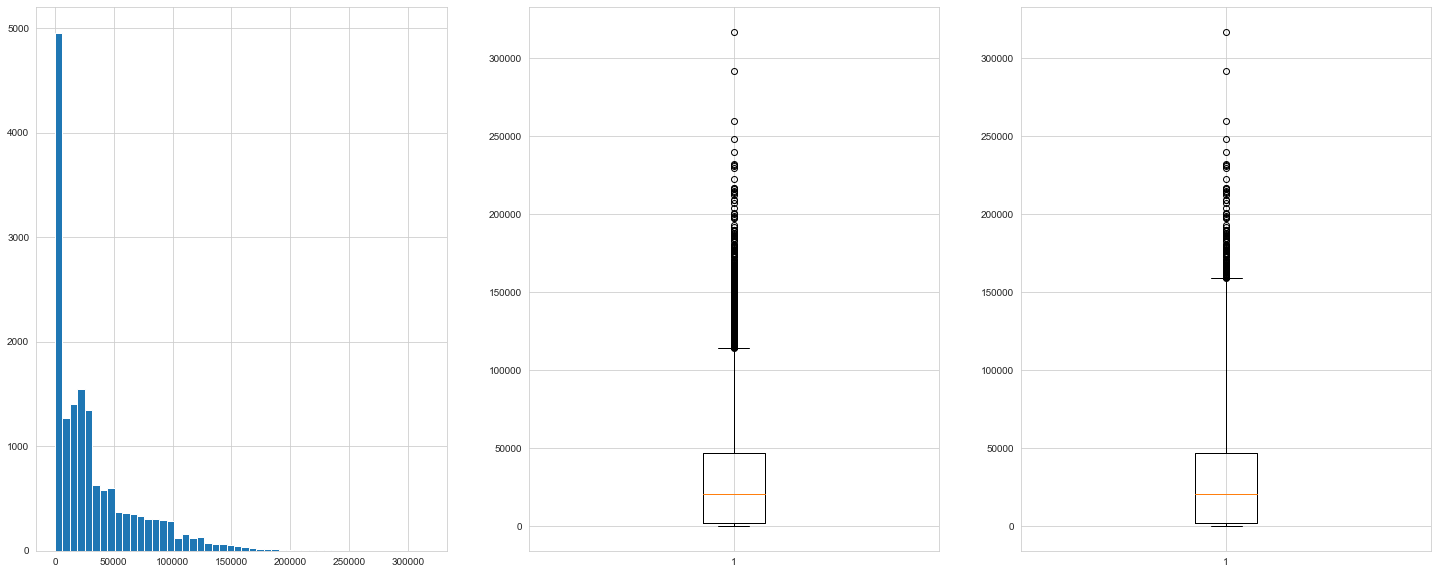

In [262]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
plt.hist(df.km, bins=50)

plt.subplot(1, 3, 2)
plt.boxplot(df.km)

plt.subplot(1, 3, 3)
plt.boxplot(df.km, whis=2.5)
plt.show()


In [263]:
df.groupby('age')['km'].mean()

age
0.000    1648.101
1.000   18041.843
2.000   41748.577
3.000   77450.063
Name: km, dtype: float64

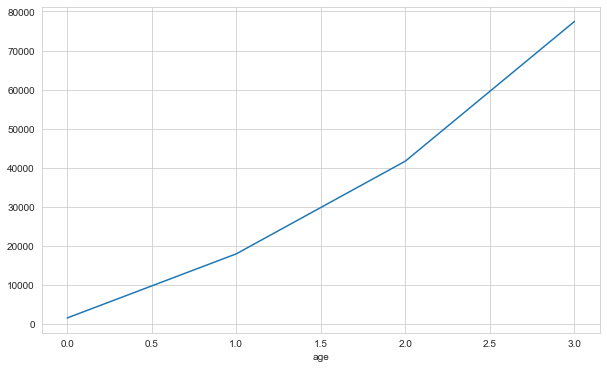

In [264]:
df.groupby('age')['km'].mean().plot()
plt.show()

### num_of_doors

In [265]:
df.num_of_doors.value_counts(dropna=False)

5.000    11786
4.000     3079
3.000      831
2.000      219
Name: num_of_doors, dtype: int64

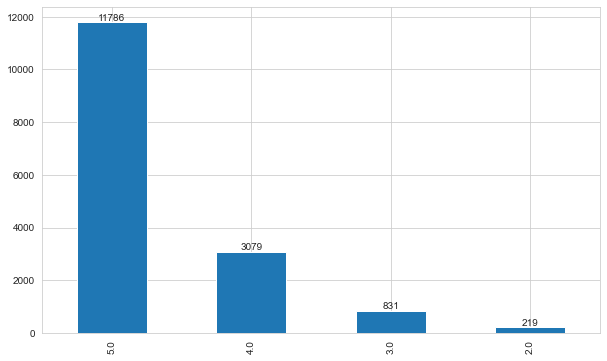

In [266]:
fig, ax = plt.subplots()

df['num_of_doors'].value_counts().plot(
    kind='bar', x=index, y=values)


for container in ax.containers:
    ax.bar_label(container)


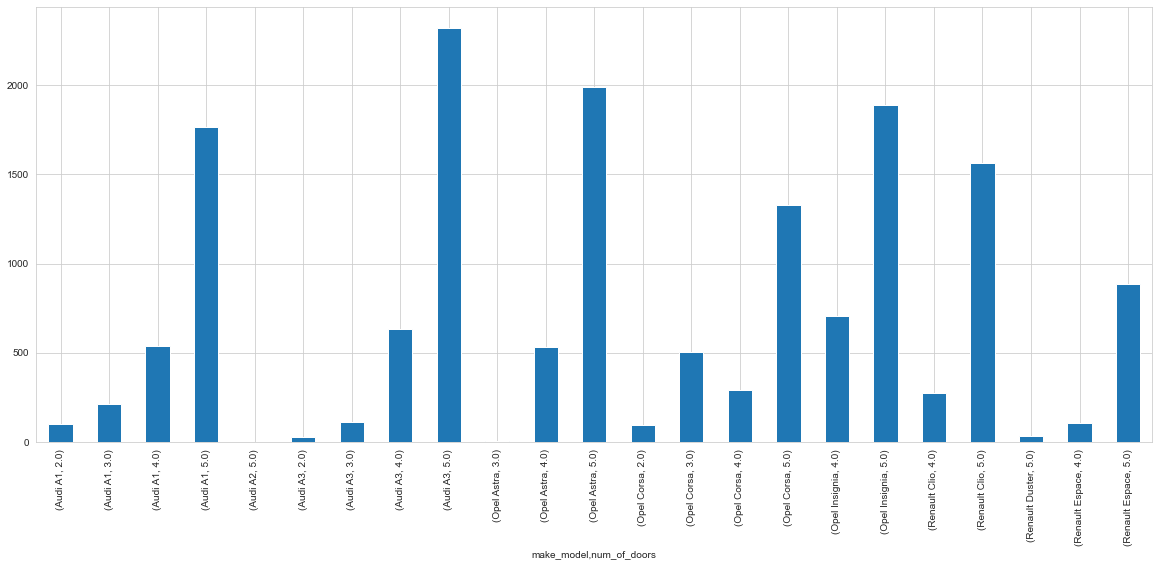

In [267]:
plt.figure(figsize=(20, 8))
df.groupby(["make_model", "num_of_doors"]).num_of_doors.count().plot.bar()
plt.show()

### num_of_seats

In [268]:
df.num_of_seats.value_counts(dropna=False)

5.000    14307
4.000     1127
7.000      362
2.000      119
Name: num_of_seats, dtype: int64

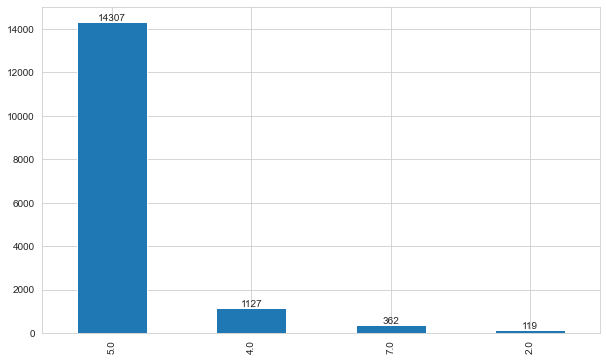

In [269]:
fig, ax = plt.subplots()

df['num_of_seats'].value_counts().plot(
    kind='bar', x=index, y=values)


for container in ax.containers:
    ax.bar_label(container)

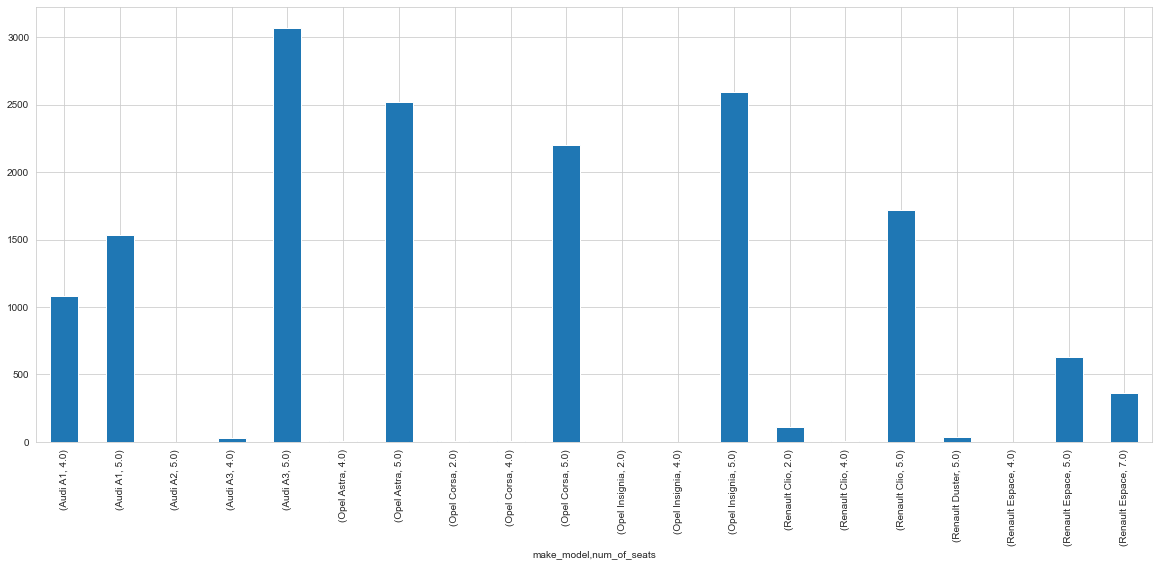

In [270]:
plt.figure(figsize=(20, 8))
df.groupby(["make_model", "num_of_seats"]).num_of_doors.count().plot.bar()
plt.show()


### weight_kg 

In [271]:
df.weight_kg.value_counts(dropna=False)

1163.000    1582
1360.000    1419
1487.000     967
1135.000     837
1425.000     744
            ... 
1331.000       1
1132.000       1
1252.000       1
1792.000       1
2037.000       1
Name: weight_kg, Length: 432, dtype: int64

In [272]:
df.weight_kg.describe()


count   15915.000
mean     1337.701
std       199.682
min       840.000
25%      1165.000
50%      1295.000
75%      1472.000
max      2471.000
Name: weight_kg, dtype: float64

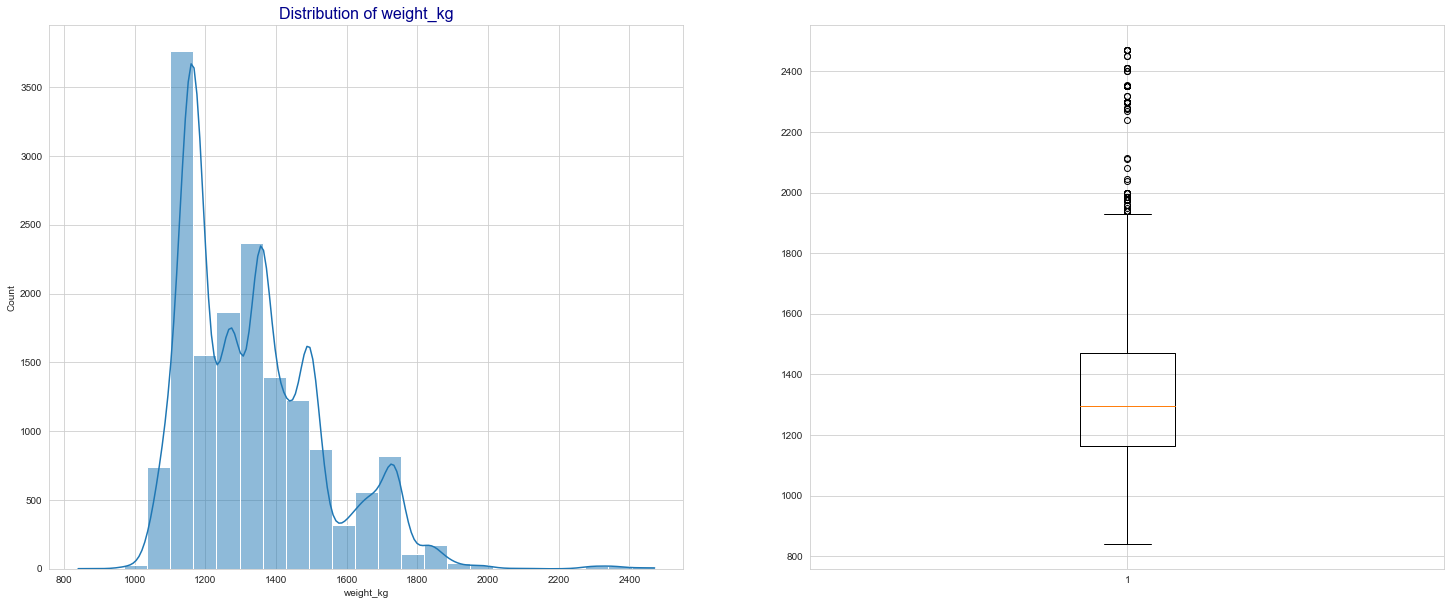

In [273]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='weight_kg', bins=25, kde=True)
plt.title('Distribution of weight_kg',fontsize=16, color="darkblue")

plt.subplot(1, 2, 2)
plt.boxplot(df.weight_kg)
plt.show()

In [274]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'inspection_new', 'paint_type', 'num_of_doors', 'num_of_seats',
       'gearing_type', 'drive_chain', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'age',
       'hp_kw', 'type', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

### hp_kw

In [275]:
df.hp_kw.value_counts(dropna=False)

85.000     2543
66.000     2121
81.000     1403
100.000    1313
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000       3
80.000        3
93.000        3
167.000       2
228.000       2
53.000        2
143.000       2
150.000       2
140.000       2
270.000       2
63.000  

In [276]:
df.hp_kw.isnull().sum()

0

In [277]:
list(df.hp_kw.unique())

[66.0,
 141.0,
 85.0,
 70.0,
 92.0,
 112.0,
 60.0,
 71.0,
 67.0,
 110.0,
 93.0,
 147.0,
 86.0,
 140.0,
 87.0,
 81.0,
 82.0,
 135.0,
 132.0,
 100.0,
 96.0,
 162.0,
 150.0,
 294.0,
 228.0,
 270.0,
 137.0,
 9.0,
 133.0,
 77.0,
 101.0,
 78.0,
 103.0,
 1.0,
 74.0,
 118.0,
 84.0,
 88.0,
 80.0,
 76.0,
 149.0,
 51.0,
 44.0,
 55.0,
 52.0,
 63.0,
 40.0,
 65.0,
 75.0,
 125.0,
 120.0,
 184.0,
 239.0,
 121.0,
 143.0,
 191.0,
 89.0,
 195.0,
 127.0,
 122.0,
 154.0,
 155.0,
 104.0,
 123.0,
 146.0,
 90.0,
 56.0,
 53.0,
 54.0,
 164.0,
 4.0,
 163.0,
 57.0,
 119.0,
 165.0,
 117.0,
 115.0,
 98.0,
 168.0,
 167.0]

In [278]:
df.hp_kw.nunique()

80

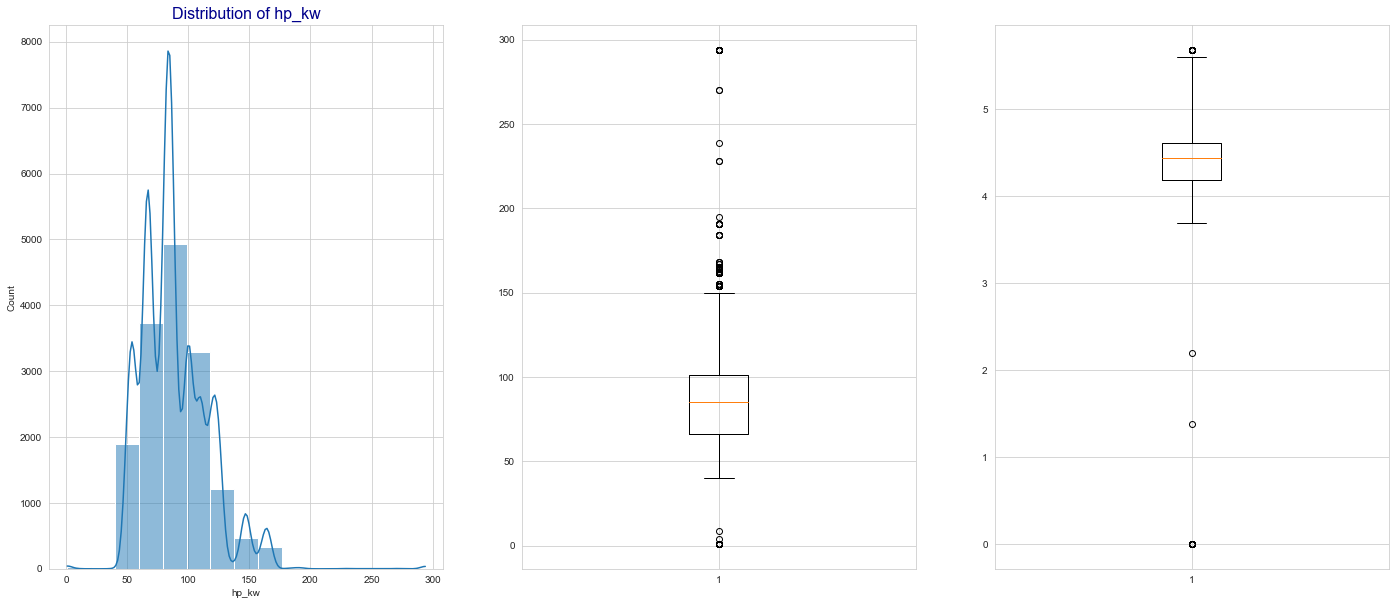

In [279]:
plt.figure(figsize=(24, 10))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='hp_kw', bins=15, kde=True)
plt.title('Distribution of hp_kw', fontsize=16, color="darkblue")

plt.subplot(1, 3, 2)
plt.boxplot(df.hp_kw)

plt.subplot(1, 3, 3)
plt.boxplot(np.log(df.hp_kw), whis=2.5)
plt.show()




### cons_comb

In [280]:
df.cons_comb.value_counts(dropna=False)

4.000    1020
5.600     963
5.400     900
5.000     810
4.700     766
3.900     733
4.500     731
4.400     668
5.100     657
3.800     584
4.800     580
4.200     579
4.900     535
5.300     530
5.200     454
4.600     425
5.500     389
5.900     369
3.700     369
4.100     362
5.700     342
6.000     331
3.300     307
4.300     307
3.500     288
3.600     231
6.200     219
6.300     181
6.100     175
5.800     165
6.600     148
6.800     136
3.400     125
6.400      75
3.000      69
7.400      66
6.500      43
6.700      43
7.100      38
6.900      27
3.200      25
8.300      20
3.650      20
3.450      19
5.150      19
7.600      14
7.000      10
3.100       7
7.800       6
7.200       6
8.000       5
8.600       4
3.950       3
7.900       3
8.700       3
7.300       2
8.100       2
5.450       2
4.550       2
9.100       1
4.300       1
7.500       1
Name: cons_comb, dtype: int64

In [281]:
df.cons_comb.describe()


count   15915.000
mean        4.832
std         0.868
min         3.000
25%         4.100
50%         4.800
75%         5.400
max         9.100
Name: cons_comb, dtype: float64

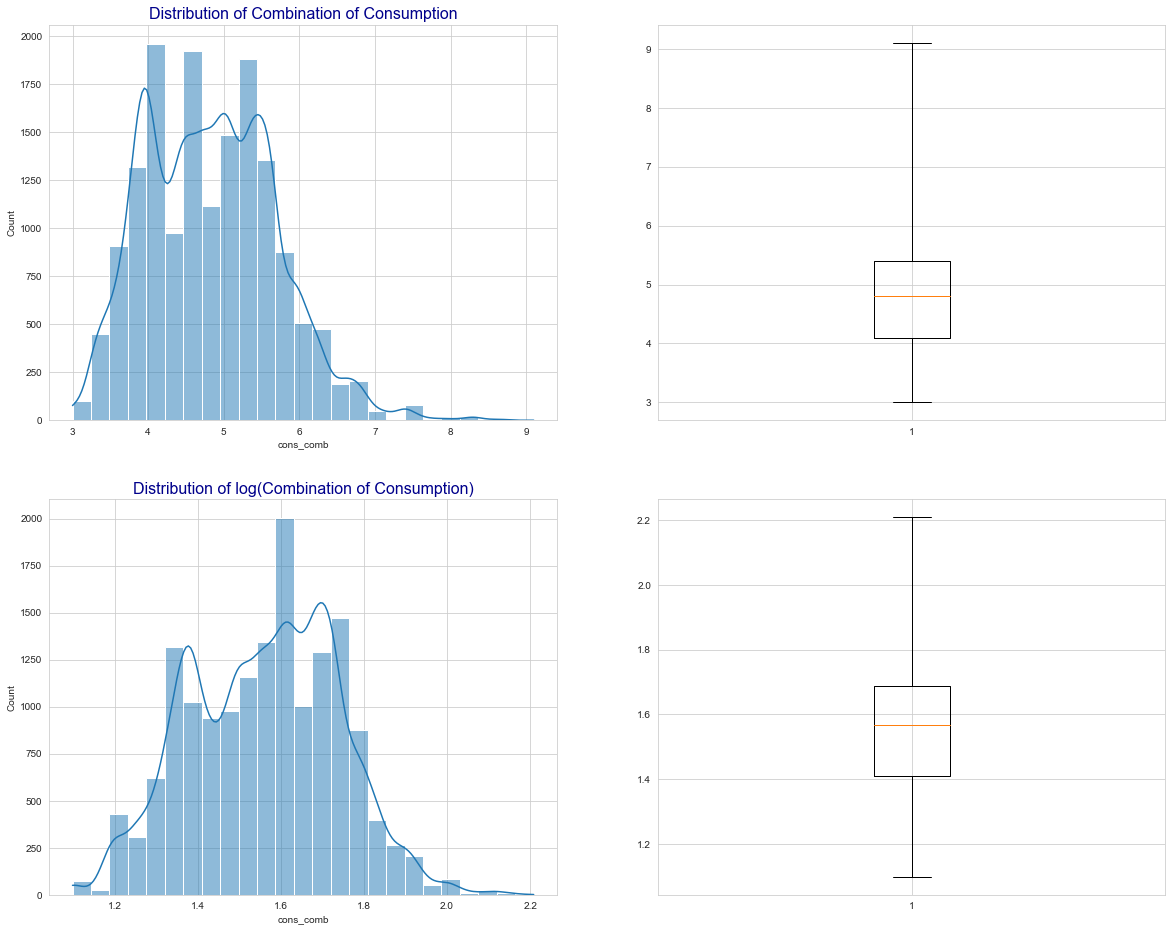

In [282]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='cons_comb', bins=25, kde=True)
plt.title('Distribution of Combination of Consumption', fontsize=16, color="darkblue")

plt.subplot(2, 2, 2)
plt.boxplot(df.cons_comb, whis=3)

plt.subplot(2, 2, 3)
sns.histplot(data=df, x=np.log(df.cons_comb), bins=25, kde=True)
plt.title('Distribution of log(Combination of Consumption)',
          fontsize=16, color="darkblue")

plt.subplot(2, 2, 4)
plt.boxplot(np.log(df.cons_comb), whis=2.3)
plt.show()


### displacement_cc

In [283]:
df.displacement_cc.describe()


count   15915.000
mean     1425.654
std       329.724
min         1.000
25%      1229.000
50%      1461.000
75%      1598.000
max     16000.000
Name: displacement_cc, dtype: float64

In [284]:
df.sort_values(by=["displacement_cc"], ascending=False)[
    "displacement_cc"].head(15)


10932   16000.000
7169    15898.000
10771    2967.000
3599     2480.000
3609     2480.000
3598     2480.000
3610     2480.000
3648     2480.000
3595     2480.000
3587     2480.000
3593     2480.000
3649     2480.000
3600     2480.000
3590     2480.000
3592     2480.000
Name: displacement_cc, dtype: float64

In [285]:
df.sort_values(by=["displacement_cc"], ascending=True)[
    "displacement_cc"].head(54)


12750     1.000
12835     1.000
14315     1.000
12467     1.000
12473     1.000
12823     1.000
12484     1.000
12499     1.000
14326     1.000
14327     1.000
12670     1.000
12815     1.000
14314     1.000
12800     1.000
12798     1.000
14322     1.000
12604     1.000
12786     1.000
12501     1.000
14325     1.000
12554     1.000
14324     1.000
12796     1.000
14319     1.000
12783     1.000
12790     1.000
12848     1.000
12781     1.000
12849     1.000
14284     1.000
12769     1.000
13904     1.000
12768     1.000
14328     1.000
14320     1.000
14321     1.000
10559     2.000
14198     2.000
13912    54.000
10194   122.000
7811    139.000
7812    139.000
7810    139.000
7809    139.000
8128    140.000
15577   160.000
15574   160.000
15579   160.000
15575   160.000
15576   160.000
15578   160.000
13653   890.000
14722   898.000
14504   898.000
Name: displacement_cc, dtype: float64

There are very large and very small values for this column: 1, 2, 54, 122, 139, 140, 160, 16000, 15898

In [286]:
list_num = [1, 2, 54, 122, 139, 140, 160, 16000, 15898]


In [287]:
df.displacement_cc.isin(list_num)


0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: displacement_cc, Length: 15915, dtype: bool

In [288]:
df.loc[df.displacement_cc.isin(list_num), "displacement_cc"] = np.nan


In [289]:
df.displacement_cc.isnull().sum()

53

In [290]:
fill(df, "make_model", "body_type", "displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000    5076
999.000     2465
1398.000    1387
1399.000     772
1461.000     682
1229.000     678
1956.000     670
1490.000     559
1422.000     467
1197.000     372
898.000      351
1395.000     320
1968.000     301
1149.000     288
1618.000     212
1798.000     210
1498.000     196
1600.000     130
1248.000     110
1997.000     103
1364.000     102
1400.000      90
998.000       72
1500.000      50
2000.000      46
1000.000      40
1998.000      25
2480.000      20
1984.000      18
1200.000      18
1397.000      11
899.000       11
929.000        5
1499.000       5
997.000        4
900.000        4
1596.000       4
1599.000       3
1396.000       3
1199.000       3
1589.000       2
1300.000       2
1495.000       2
995.000        2
890.000        1
1333.000       1
1580.000       1
1995.000       1
1533.000       1
1100.000       1
1198.000       1
1496.000       1
1368.000       1
1896.000       1
1584.000       1
1568.000       1
996.000   

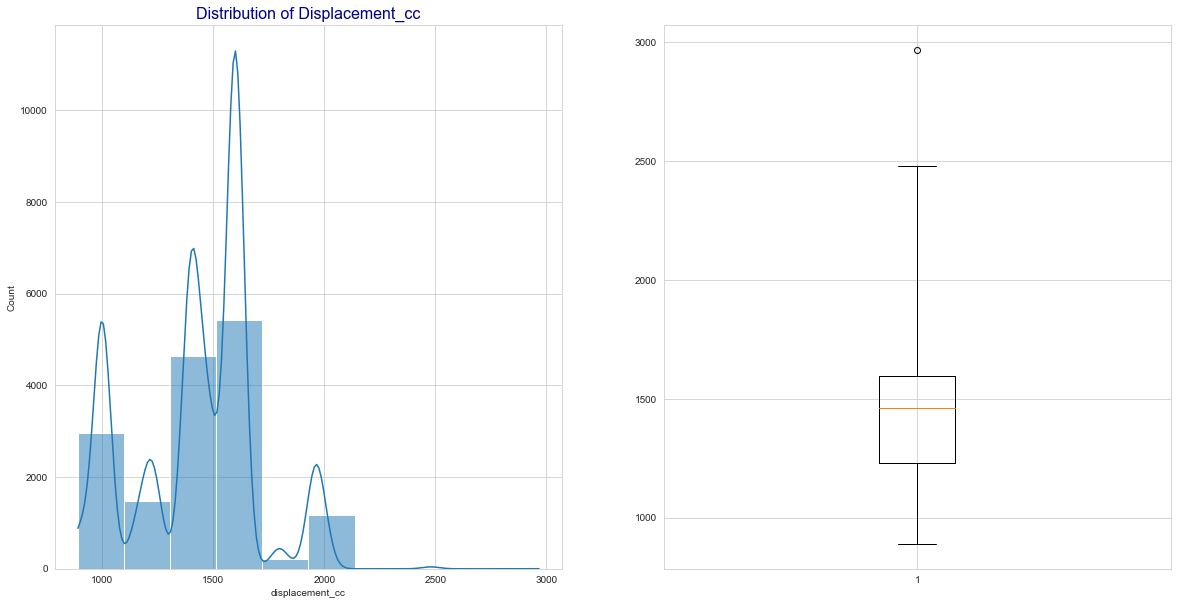

In [291]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='displacement_cc', bins=10, kde=True)
plt.title('Distribution of Displacement_cc',
          fontsize=16, color="darkblue")

plt.subplot(1, 2, 2)
plt.boxplot(df.displacement_cc, whis=3)
plt.show()

In [292]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'inspection_new', 'paint_type', 'num_of_doors', 'num_of_seats',
       'gearing_type', 'drive_chain', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'age',
       'hp_kw', 'type', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

In [293]:
df.head(3).T


,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
...,...,...,...
upholstery_type,Cloth,Cloth,Cloth
upholstery_color,Black,Grey,Black
displacement_cc,1422.000,1798.000,1598.000
weight_kg,1220.000,1255.000,1135.000


In [294]:
numeric_features = "price,km,gears,previous_owners,cons_comb,displacement_cc,age,hp_kw,weight_kg".split(",")


In [295]:
df_num = df[numeric_features]
df_num

,price,km,gears,previous_owners,cons_comb,displacement_cc,age,hp_kw,weight_kg
0,15770,56013.000,7.000,2.000,3.800,1422.000,3.000,66.000,1220.000
1,14500,80000.000,7.000,1.000,5.600,1798.000,2.000,141.000,1255.000
2,14640,83450.000,7.000,1.000,3.800,1598.000,3.000,85.000,1135.000
3,14500,73000.000,6.000,1.000,3.800,1422.000,3.000,66.000,1195.000
4,16790,16200.000,7.000,1.000,4.100,1422.000,3.000,66.000,1135.000
...,...,...,...,...,...,...,...,...,...
15914,39950,1647.363,6.000,1.000,5.300,1997.000,0.000,147.000,1758.000
15915,39885,9900.000,7.000,1.000,7.400,1798.000,0.000,165.000,1708.000
15916,39875,15.000,6.000,1.000,5.300,1997.000,0.000,146.000,1734.000
15917,39700,10.000,6.000,1.000,5.300,1997.000,0.000,147.000,1758.000


In [296]:
df_num.shape

(15915, 9)

In [297]:
df_num.describe()

,price,km,gears,previous_owners,cons_comb,displacement_cc,age,hp_kw,weight_kg
count,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000,15915.000
mean,18024.381,32089.996,5.912,1.043,4.832,1428.662,1.390,88.377,1337.701
std,7381.679,36977.215,0.729,0.338,0.868,275.804,1.121,26.846,199.682
min,4950.000,0.000,5.000,0.000,3.000,890.000,0.000,1.000,840.000
25%,12850.000,1920.500,5.000,1.000,4.100,1229.000,0.000,66.000,1165.000
50%,16900.000,20413.000,6.000,1.000,4.800,1461.000,1.000,85.000,1295.000
75%,21900.000,46900.000,6.000,1.000,5.400,1598.000,2.000,101.000,1472.000
max,74600.000,317000.000,9.000,4.000,9.100,2967.000,3.000,294.000,2471.000


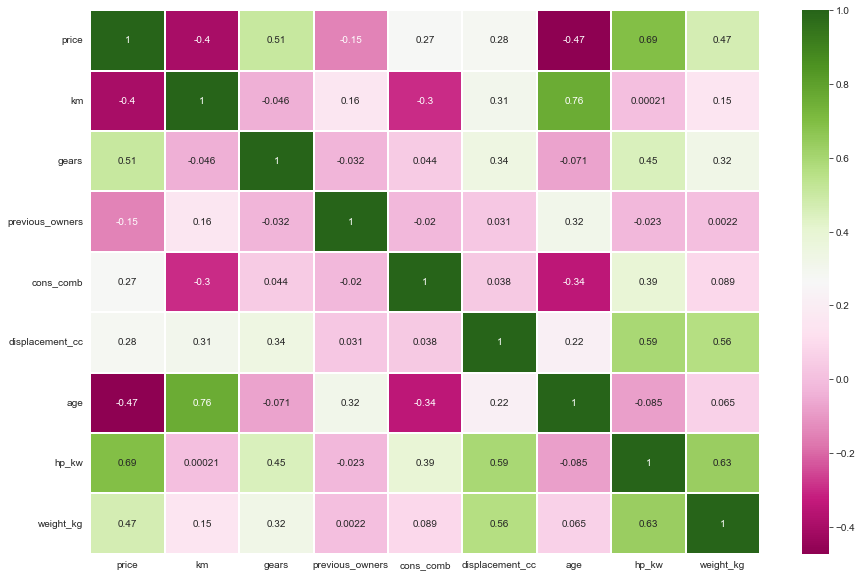

In [298]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_num.corr(), annot=True, cmap=('PiYG'), linewidths=0.2);


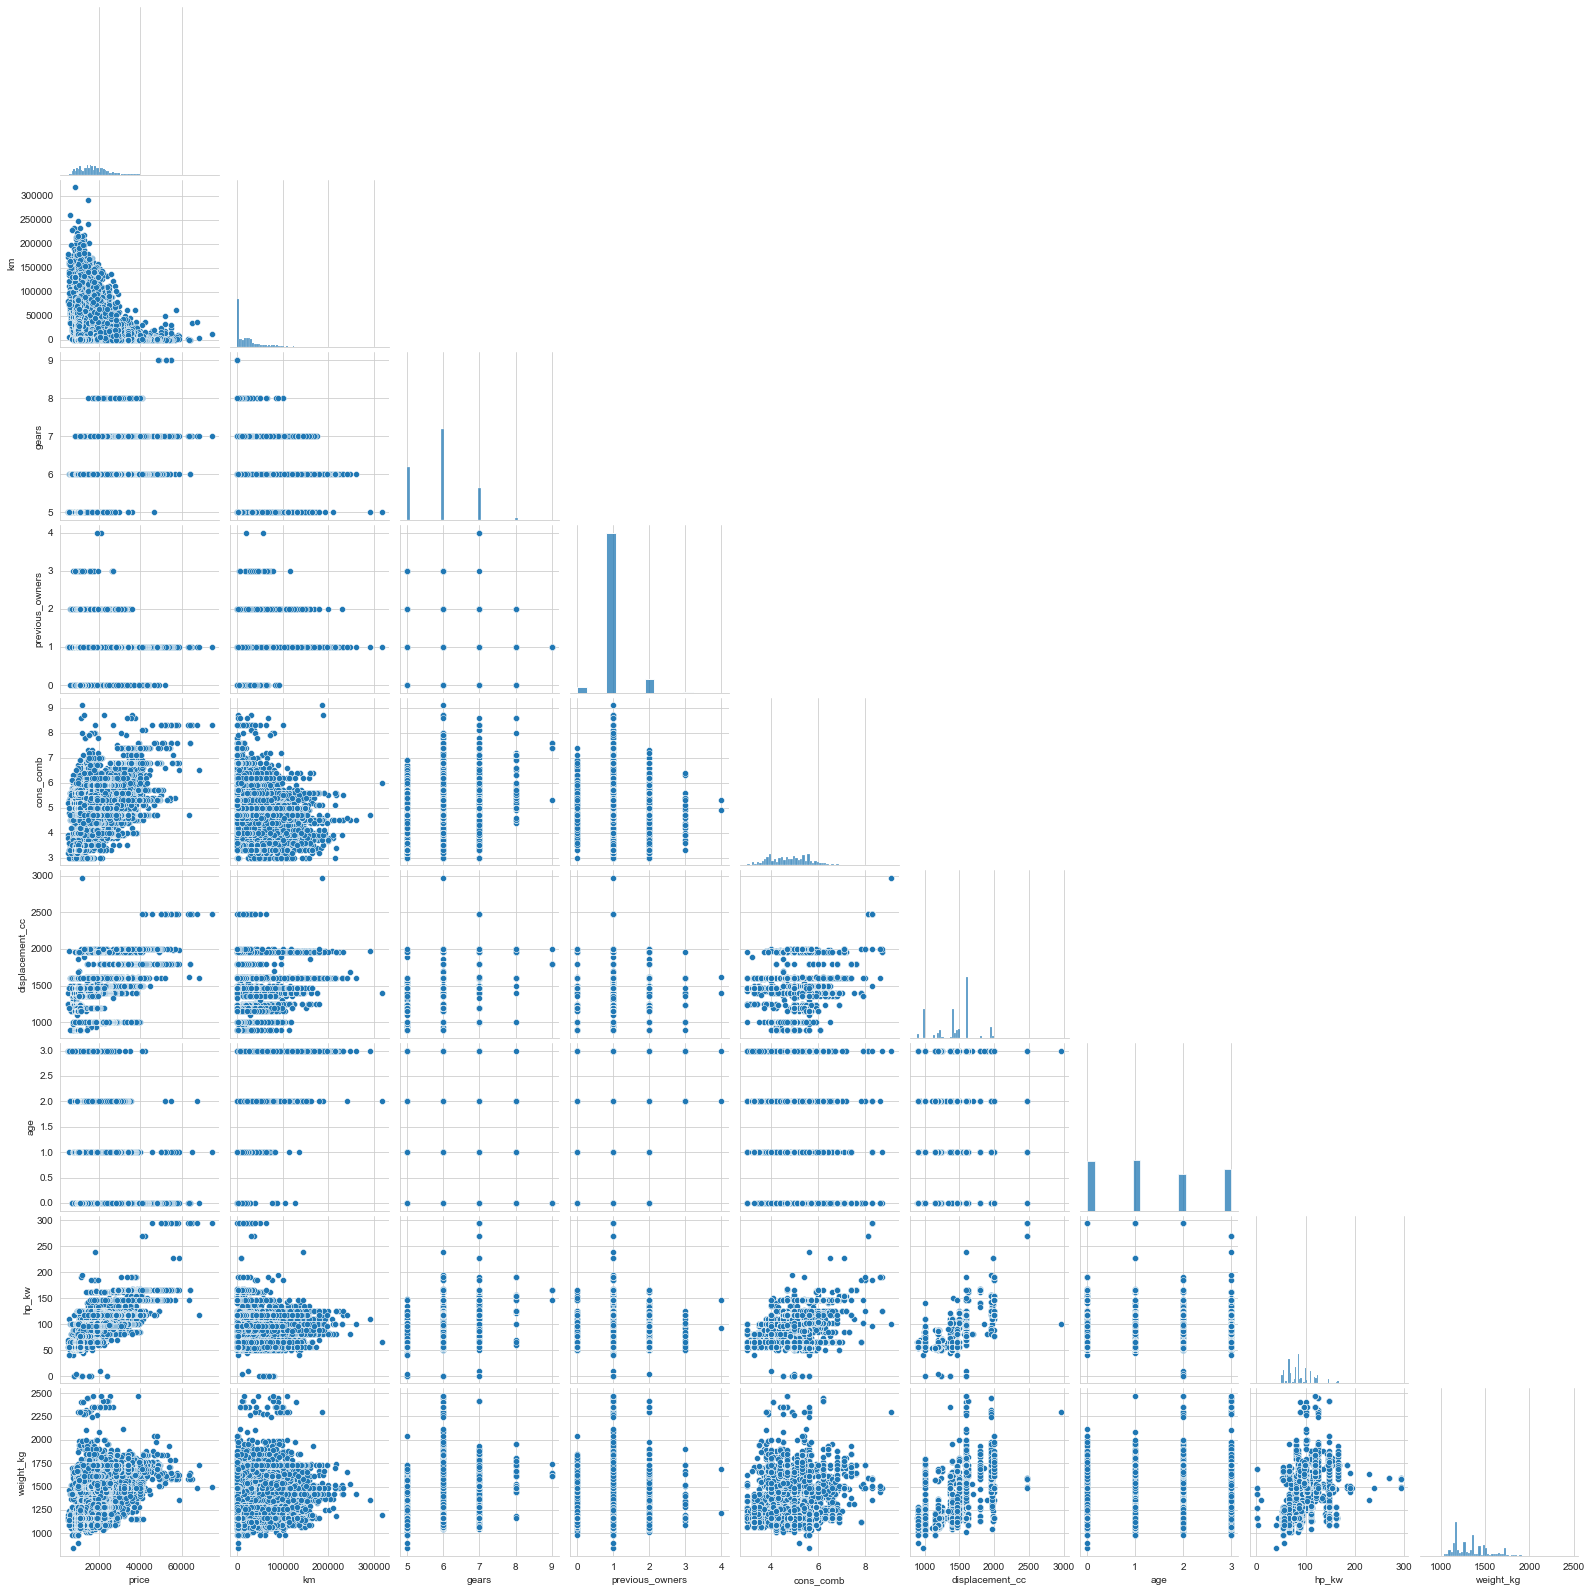

In [299]:
sns.pairplot(df_num, corner=True)
plt.show()


---------------------------------------------------

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   previous_owners      15915 non-null  float64
 6   inspection_new       15915 non-null  int64  
 7   paint_type           15915 non-null  object 
 8   num_of_doors         15915 non-null  float64
 9   num_of_seats         15915 non-null  float64
 10  gearing_type         15915 non-null  object 
 11  drive_chain          15915 non-null  object 
 12  fuel                 15915 non-null  object 
 13  comfort_convenience  15915 non-null  object 
 14  entertainment_media  15915 non-null  object 
 15  extras               15915 non-null 

In [301]:
df.shape

(15915, 26)

In [302]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'inspection_new', 'paint_type', 'num_of_doors', 'num_of_seats',
       'gearing_type', 'drive_chain', 'fuel', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'age',
       'hp_kw', 'type', 'upholstery_type', 'upholstery_color',
       'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

In [303]:
df.to_csv("autoscout_final_notdummy.csv", index=False)


In [304]:
df[["comfort_convenience", "entertainment_media", "extras", "safety_security"]]


,comfort_convenience,entertainment_media,extras,safety_security
0,"Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system","Bluetooth, Hands-free equipment, On-board computer, Radio","Alloy wheels, Catalytic Converter, Voice Control","ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights"
1,"Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows","Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system","Alloy wheels, Sport seats, Sport suspension, Voice Control","ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights"
2,"Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system","MP3, On-board computer","Alloy wheels, Voice Control","ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control"
3,"Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system","Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB","Alloy wheels, Sport seats, Voice Control","ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system"
4,"Air conditioning, Armrest, Automatic climate control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Start-stop system","Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB","Alloy wheels, Sport package, Sport suspension, Voice Control","ABS, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights"
...,...,...,...,...
15914,"Air conditioning, Automatic climate control, Cruise control, Electrically adjustable seats, Electrical side mirrors, Hill Holder, Keyless central door lock, Leather steering wheel, Light sensor, Massage seats, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Split rear seats, Start-stop system, Tinted windows","Bluetooth, Digital radio, Hands-free equipment, On-board computer, Radio, USB","Alloy wheels, Touch screen","ABS, Central door lock, Central door lock with remote control, Driver-side airbag, Electronic stability control, Emergency brake assistant, Head airbag

In [305]:
df = df.join(df["comfort_convenience"].str.get_dummies(
    sep=",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(
    sep=",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep=",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_"))


In [306]:
df.drop(["comfort_convenience", "entertainment_media",
        "extras", "safety_security"], axis=1, inplace=True)


In [307]:
df.drop(["num_of_doors", "num_of_seats",
        "upholstery_color"], axis=1, inplace=True)


In [308]:
df.shape


(15915, 174)

In [309]:
df_final = pd.get_dummies(df)


In [310]:

df_final.shape


(15915, 207)

In [311]:
len(df_final.columns)


207

In [312]:
df_final.to_csv("autoscout_final_dummy.csv", index=False)
